<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: How are consumer industries' emissions affected by shifts in production?



In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import levene
df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/SupplyChainEmissions.csv')

df = df.drop(columns=['Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions',
    '2017 NAICS Code': 'NAICS Code'
}, inplace=True)

Basic viewing of industry emission scale

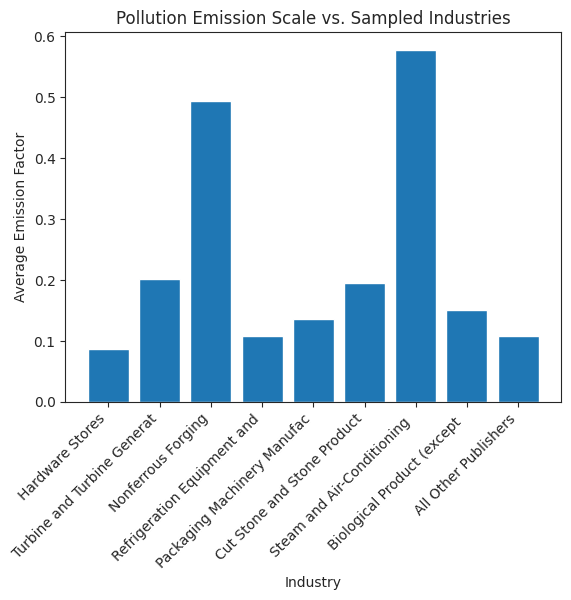

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns



sample_df = df.sample(9)
x = sample_df['Industry']
y = sample_df['Total_Emissions']



plt.bar(x.str[:27],
        y,
        label="Pollution Emission Scale vs. Industry")
plt.xlabel("Industry")
plt.ylabel('Average Emission Factor')
plt.title("Pollution Emission Scale vs. Sampled Industries")
plt.xticks(rotation=45, ha="right")
plt.show()

Mapping data to fit research question through categories

In [177]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Electricity', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing', 'Gas'],
    'Food, Farming, & Beverages': ['Farm', 'Food', 'Beverage', 'Alcohol', 'Snack', 'Fish', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery', 'Restaurant', 'Tortilla', 'Corn', 'Farming', 'Dining', 'Flour', 'Pasta', 'Bakery', 'Bakeries', 'Convenience'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Taxi', 'Airplane', 'Car', 'Train', 'Bus', 'Transport'],
    'Fashion': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear', 'Fashion', 'Designer', 'Jewelry'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary', 'Vet', 'Safety', 'Ambulance', 'Clinic', 'Medicine'],
    'Entertainment / Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture', 'Movie', 'TV', 'Gambling', 'Casino', 'Game', 'Sports', 'Gaming', 'Theatre', 'Park'],
    'Financial & Organization Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing', 'Claims', 'Loan', 'Brokers', 'Trust', 'Court', 'Financial', 'Consulting'],
    'Manufacturing and Development': ['Manufacturing', 'Engineering', 'Corperate', 'Production', 'Extraction', 'Fuel', 'Development', 'Research', 'Refining', 'Internet']
}

# Loops through all industries, searches and finds matching keywords, creates a boolean mask, and then assigns it to one of the above categories.
for category, keywords in keywords_map.items():
    sortdef = r'\b(' + '|'.join(keywords) + r')\b'
    bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
    df_consumer.loc[bmask, 'Consumer Category'] = category


# --> samples data for proofing and checking
print("number of industries assigned to each category:")
print(df_final['Consumer Category'].value_counts())

print("\nsample of mapped industries:")
print(df_final[['Industry', 'Consumer Category']].sample(10))

number of industries assigned to each category:
Consumer Category
Manufacturing and Development    261
Other                             54
Food, Farming, & Beverages        31
Fashion                            9
Housing & Utilities                1
Transportation                     1
Name: count, dtype: int64

sample of mapped industries:
                                              Industry  \
24                                         Hay Farming   
292     Analytical Laboratory Instrument Manufacturing   
83   Mayonnaise, Dressing, and Other Prepared Sauce...   
166   Unlaminated Plastics Profile Shape Manufacturing   
313  Motor Vehicle Electrical and Electronic Equipm...   
99                                Fabric Coating Mills   
167       Plastics Pipe and Pipe Fitting Manufacturing   
211                             Iron and Steel Forging   
303       Current-Carrying Wiring Device Manufacturing   
163  All Other Miscellaneous Chemical Product and P...   

                 

/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning

Creating a prototype bar plot to display carbon footprint in each created category

/tmp/ipython-input-938126296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')


\ghg emissions by consumer spending category:
Consumer Category
Food, Farming, & Beverages           0.573810
Manufacturing and Development        0.340860
Housing & Utilities                  0.282571
Transportation                       0.263500
Other                                0.243414
Fashion                              0.238846
Entertainment / Recreation           0.119348
Healthcare                           0.116429
Financial & Organization Services    0.074524
Name: Total_Emissions, dtype: float64


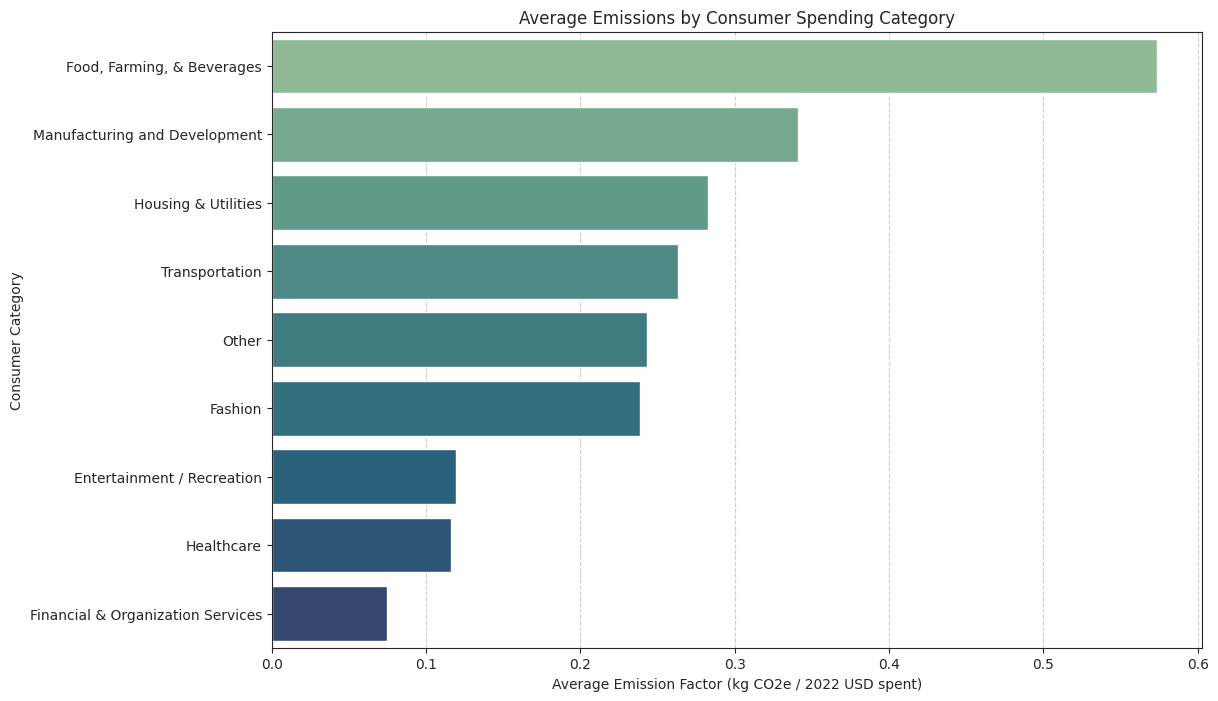

In [178]:
import seaborn as sns

# average emission factor for each consumer categ
emission_factor_avg = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\ghg emissions by consumer spending category:")
print(emission_factor_avg)


sns.set_style('ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')
plt.title('Average Emissions by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()

In [179]:
# I'm importing another dataset with the same industries in order to see the exports value connected to industries

import pandas as pd
import matplotlib as plt
pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')

exports_df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')
exported_df = exports_df.drop(df.index[[0, 1,2]])
df_cleaned = exported_df.dropna(subset=['Total Exports Value ($US)'])
df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned.head())
print("-------")
print(df_consumer.head())

print("-------")


df_cleaned.head(11)
df_cleaned.head(11)
print("-------")
df_cleaned.info()
df_consumer.info()

                          Commodity Total Exports Value ($US)
0            1111 Oilseeds & Grains             3,094,052,185
1                    11111 Soybeans               699,526,766
2                   111110 Soybeans               699,526,766
3   11112 Oilseeds (except Soybean)                15,826,919
4  111120 Oilseeds (except Soybean)                15,826,919
-------
   NAICS Code                          Industry       GHG  \
0      111110                   Soybean Farming  All GHGs   
1      111120  Oilseed (except Soybean) Farming  All GHGs   
2      111130          Dry Pea and Bean Farming  All GHGs   
3      111140                     Wheat Farming  All GHGs   
4      111150                      Corn Farming  All GHGs   

                                Unit  Emissions_No_Margins  Margins  \
0  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
1  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
2  kg CO2e/2022 USD, purchaser price    

Merged DataFrame Head:
   NAICS Code                          Industry       GHG  \
0      111110                   Soybean Farming  All GHGs   
1      111120  Oilseed (except Soybean) Farming  All GHGs   
2      111130          Dry Pea and Bean Farming  All GHGs   
3      111140                     Wheat Farming  All GHGs   
4      111150                      Corn Farming  All GHGs   

                                Unit  Emissions_No_Margins  Margins  \
0  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
1  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
2  kg CO2e/2022 USD, purchaser price                 0.809    0.040   
3  kg CO2e/2022 USD, purchaser price                 0.809    0.040   
4  kg CO2e/2022 USD, purchaser price                 0.809    0.040   

   Total_Emissions           Consumer Category  Exports Value (USD)  
0            0.532  Food, Farming, & Beverages            699526766  
1            0.532  Food, Farming, & Bevera

In [181]:
emissions_cat1 = df_consumer[df_consumer['Consumer Category'] == 'Food, Farming, & Beverages']['Total_Emissions']

In [182]:
emissions_cat2= df_consumer[df_consumer['Consumer Category'] == 'Manufacturing and Development']['Total_Emissions']

In [183]:
levene(emissions_cat1,emissions_cat2, center='median', proportiontocut=0.05, axis=0, nan_policy='propagate', keepdims=False)

LeveneResult(statistic=np.float64(16.39044493199809), pvalue=np.float64(6.277007757333636e-05))

In [184]:
scipy.stats.ttest_ind(emissions_cat1, emissions_cat2, equal_var=False)

TtestResult(statistic=np.float64(3.1077767608304776), pvalue=np.float64(0.002793636212548898), df=np.float64(65.10427329189143))

In [185]:
levene_statistic, levene_pvalue = stats.levene(emissions_cat1, emissions_cat2, center='median')

print(f"Levene's Test Statistic: {levene_statistic:.4f}")
print(f"Levene's p-value: {levene_pvalue:.4f}")

# reject H0.
if levene_pvalue < 0.05:
    print("Conclusion: The variances are significantly different. We will use Welch's t-test (equal_var=False).")
    equal_variances = False
else:
    pass

Levene's Test Statistic: 16.3904
Levene's p-value: 0.0001
Conclusion: The variances are significantly different. We will use Welch's t-test (equal_var=False).


In [186]:
ttest_statistic, ttest_p = stats.ttest_ind(emissions_cat1, emissions_cat2, equal_var=equal_variances)

print("\n--- Independent samples t-test ---")
print(f"T-statistic: {ttest_statistic}")
print(f"P-value: {ttest_p}")

# Interpretation of the result
alpha = 0.05
if ttest_p < alpha:
    print(" The p-value is less than the significance level of 0.05. We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean total emissions between the two consumer categories.")


# You can also get the means to see which group is higher
mean_food_farming = emissions_cat1.mean()
mean_manufacturing = emissions_cat2.mean()
print(f"\nmean emissions for Food, Farming, & Beverages: {mean_food_farming:.2f}")
print(f"Mean emissions for Manufacturing and Development: {mean_manufacturing:.2f}")


--- Independent samples t-test ---
T-statistic: 3.1077767608304776
P-value: 0.002793636212548898
 The p-value is less than the significance level of 0.05. We reject the null hypothesis.
There is a statistically significant difference in the mean total emissions between the two consumer categories.

mean emissions for Food, Farming, & Beverages: 0.57
Mean emissions for Manufacturing and Development: 0.34


/tmp/ipython-input-550982581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Total Emissions', data=plot_df, palette='pastel')


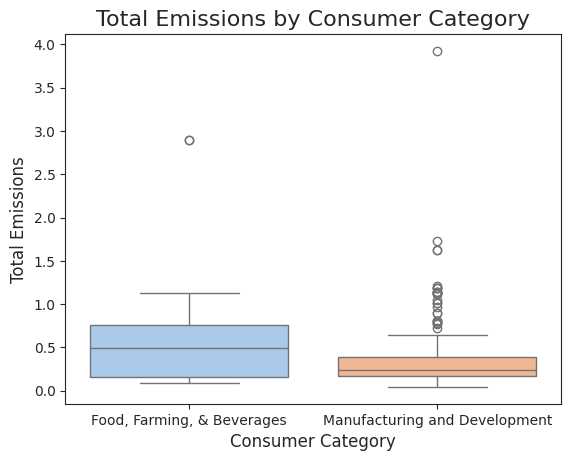

In [187]:
# Combine the data for plotting
import matplotlib.pyplot as plt
plot_df = pd.DataFrame({
    'Category': ['Food, Farming, & Beverages'] * len(emissions_cat1) +
                ['Manufacturing and Development'] * len(emissions_cat2),
    'Total Emissions': list(emissions_cat1) + list(emissions_cat2)
})


sns.boxplot(x='Category', y='Total Emissions', data=plot_df, palette='pastel')
plt.title('Total Emissions by Consumer Category', fontsize=16)
plt.xlabel('Consumer Category', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.show()

In [188]:

from scipy import stats


consumer_cat = df_consumer['Consumer Category'].unique()
print("all consumer categories:", consumer_cat)

groups = [df_consumer[df_consumer['Consumer Category'] == category]['Total_Emissions'] for category in consumer_cat]

f_statistic, p_value = stats.f_oneway(*groups_to_compare)

print("--- One-Way ANOVA Test ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check the significance of the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The p-value is less than the significance level of 0.05. We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean total emissions among the consumer categories.")
else:
    print("\nConclusion: The p-value is greater than the significance level of 0.05. We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean total emissions among the consumer categories.")


all consumer categories: ['Food, Farming, & Beverages' 'Other' 'Manufacturing and Development'
 'Housing & Utilities' 'Fashion' 'Transportation' 'Healthcare'
 'Entertainment / Recreation' 'Financial & Organization Services']
--- One-Way ANOVA Test ---
F-statistic: 12.9403
P-value: 0.0000

Conclusion: The p-value is less than the significance level of 0.05. We reject the null hypothesis.
There is a statistically significant difference in the mean total emissions among the consumer categories.


In [189]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Stack the emissions data and group labels
df_anova = pd.DataFrame({
    'Emissions': df_consumer['Total_Emissions'],
    'Category': df_consumer['Consumer Category']
})

tukey_result = pairwise_tukeyhsd(endog=df_anova['Emissions'], groups=df_anova['Category'], alpha=0.05)

print("\n--- Tukey HSD ---")
print(tukey_result)


--- Tukey HSD ---
                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
              group1                            group2              meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------
       Entertainment / Recreation                           Fashion   0.1195 0.9129 -0.1539  0.3929  False
       Entertainment / Recreation Financial & Organization Services  -0.0448 0.9998 -0.2926   0.203  False
       Entertainment / Recreation        Food, Farming, & Beverages   0.4545    0.0  0.2191  0.6898   True
       Entertainment / Recreation                        Healthcare  -0.0029    1.0 -0.2912  0.2854  False
       Entertainment / Recreation               Housing & Utilities   0.1632 0.5585 -0.0932  0.4196  False
       Entertainment / Recreation     Manufacturing and Development   0.2215 0.0246  0.0152  0.4278   True
       Entertainme

/tmp/ipython-input-3438235767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Consumer Category', y='Total_Emissions', data=df_consumer, palette='viridis')


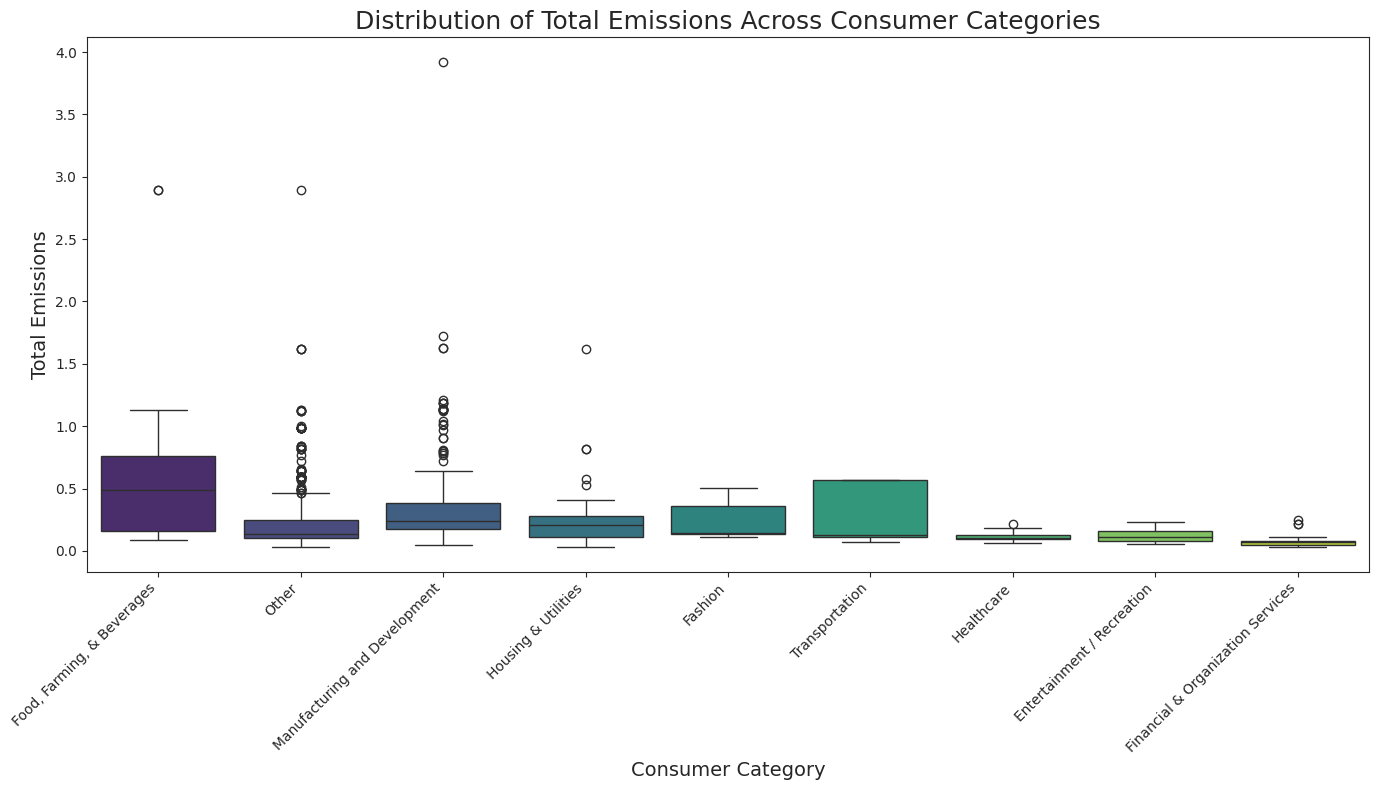

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='Consumer Category', y='Total_Emissions', data=df_consumer, palette='viridis')


plt.title('Distribution of Total Emissions Across Consumer Categories', fontsize=18)
plt.xlabel('Consumer Category', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()